<a href="https://colab.research.google.com/github/rajatDpatil/codesoft-ML-internship/blob/main/CodSoft_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bank Customer Churn Prediction

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)
import os
filename = os.path.basename(path)
data = pd.read_csv(os.path.join(path, 'Churn_Modelling.csv'))

Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


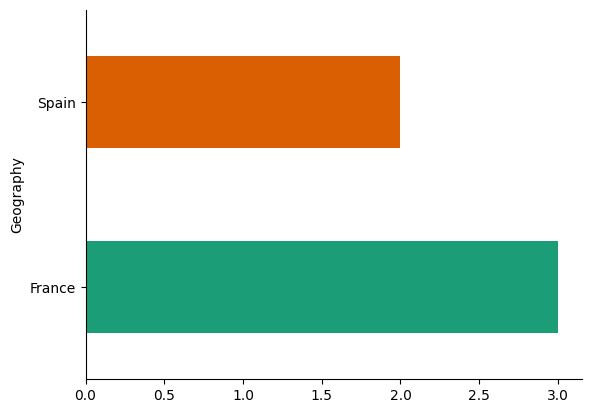

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data=data.dropna()

In [ ]:
print("Columns in the dataset:", data.columns)
if 'Partner' in data.columns:
    from sklearn.preprocessing import LabelEncoder

    encoder = LabelEncoder()
    data['Churn'] = encoder.fit_transform(data['Churn'])
    data['gender'] = encoder.fit_transform(data['gender'])
    data['Partner'] = encoder.fit_transform(data['Partner'])
    data['Dependents'] = encoder.fit_transform(data['Dependents'])
    data['PhoneService'] = encoder.fit_transform(data['PhoneService'])
    data['MultipleLines'] = encoder.fit_transform(data['MultipleLines'])
    data['InternetService'] = encoder.fit_transform(data['InternetService'])
    data['OnlineSecurity'] = encoder.fit_transform(data['OnlineSecurity'])
    data['OnlineBackup'] = encoder.fit_transform(data['OnlineBackup'])
    data['DeviceProtection'] = encoder.fit_transform(data['DeviceProtection'])
    data['TechSupport'] = encoder.fit_transform(data['TechSupport'])
    data['StreamingTV'] = encoder.fit_transform(data['StreamingTV'])
    data['StreamingMovies'] = encoder.fit_transform(data['StreamingMovies'])
    data['Contract'] = encoder.fit_transform(data['Contract'])
    data['PaperlessBilling'] = encoder.fit_transform(data['PaperlessBilling'])
    data['PaymentMethod'] = encoder.fit_transform(data['PaymentMethod'])
else:
    print("The column 'Partner' does not exist in the dataset. Skipping encoding for this column.")

if 'customerID' in data.columns:
    data = data.drop(['customerID'], axis=1)

numerical_cols = []
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    if col in data.columns:
        numerical_cols.append(col)
    else:
        print(f"Column '{col}' not found in dataset. Skipping scaling for this column.")

if numerical_cols:
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    print(f"Scaled numerical columns: {numerical_cols}")
else:
    print("No numerical columns to scale.")

data.head()


Columns in the dataset: Index(['customerid', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'churn'],
      dtype='object')
The column 'Partner' does not exist in the dataset. Skipping encoding for this column.
Column 'MonthlyCharges' not found in dataset. Skipping scaling for this column.
Column 'TotalCharges' not found in dataset. Skipping scaling for this column.
Scaled numerical columns: ['tenure']


,customerid,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,15634602,619,France,0,42,-1.041760,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,-1.387538,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,1.032908,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,-1.387538,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,-1.041760,125510.82,1,1,1,79084.10,0


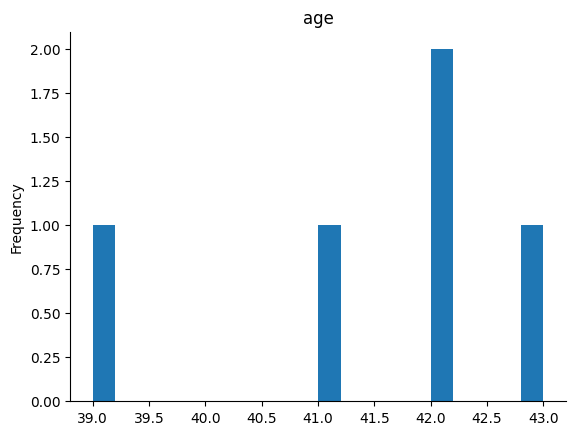

In [ ]:
from matplotlib import pyplot as plt
_df_25['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('churn', axis=1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (8000, 11)
Testing set size: (2000, 11)


In [ ]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in training data:", non_numeric_cols)
if not non_numeric_cols.empty:
    from sklearn.preprocessing import LabelEncoder

    for col in non_numeric_cols:
        encoder = LabelEncoder()
        X_train[col] = encoder.fit_transform(X_train[col])
        X_test[col] = encoder.transform(X_test[col])
    print("Encoded non-numeric columns:", non_numeric_cols)
else:
    print("All columns are numeric.")


Non-numeric columns in training data: Index([], dtype='object')
All columns are numeric.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))

Logistic Regression Accuracy: 0.8035


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Accuracy: 0.8665


In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))

Gradient Boosting Accuracy: 0.867


In [ ]:
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, gb_predictions))

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

